In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Reading input files

In [3]:
#This file is from:
#https://github.com/luispedro/BuildingMachineLearningSystemsWithPython/blob/master/ch01/data/web_traffic.tsv
#Be careful, this method stores the file on your computer
data = np.loadtxt("https://raw.githubusercontent.com/luispedro/BuildingMachineLearningSystemsWithPython/master/ch01/data/web_traffic.tsv", delimiter="\t")
data.shape

(743, 2)

## Split data and labels

In [4]:
'''We have just two attributes, in other cases 
   we do x = data[:, :-1] and y = data[:, -1], considering labels are
   located at the end
'''
x = data[:,0]
y = data[:,1]

In [5]:
np.sum(np.isnan(y))

8

## Removing nans

In [6]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

## Plotting data

In [7]:
def plotScatterAndCurves(titles, points, x_new = None,  size = (10, 10), s = 2.5, width = 2.8, curveFunctions = [], lim = []):
    '''Plot function to draw our polynomial regresion
     *** Parameters ***
     - titles: Contains title and labels of the plot
     - points: Contains points
     - x_new: Values to fit on curveFunctions
     - size: Size of the plot
     - s: Marker size of the points to scatter
     - width: line width of the curve
     - curveFunctions: List of curves with a specific color and marker to plot
     - lim: Set limits on x and y axis
    '''
    title, xLabel, yLabel = titles
    x, y = points
    legends = []
    xlim = []
    ylim = []

    if x_new is None:
        x_new = x

    try:
        xlim = lim[0]
        ylim = lim[1]
    except:
        pass

    plt.figure(figsize = size)
    plt.scatter(x, y, s = s)

    for f in curveFunctions:
        plt.plot(x_new, f(x_new), lw = width)
        legends.append(f'd = {f.order}')

    plt.legend(legends, loc='upper left')
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    weeks = x_new.shape[0]//168 + 1
    plt.xticks([w*7*24 for w in range(weeks)], [f'week {w}' for w in range(weeks)])
    try:
        plt.ylim(ylim[0], ylim[1])
        plt.xlim(xlim[0], xlim[1])
    except:
        pass

    plt.grid()
    plt.show()

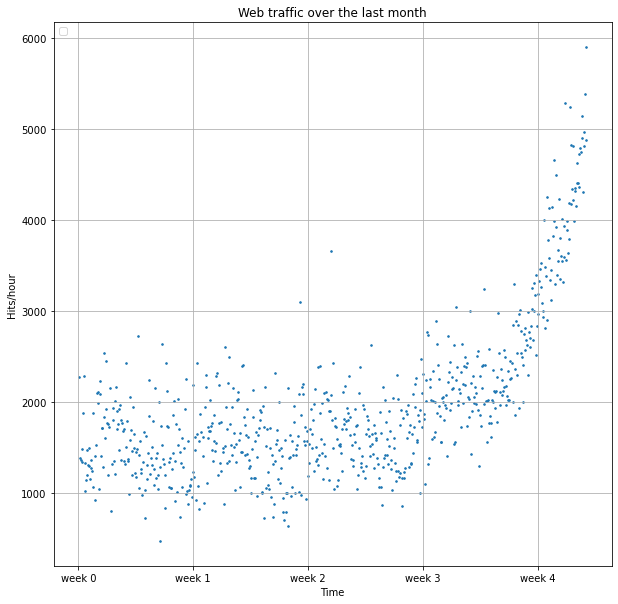

In [8]:
title = "Web traffic over the last month"
xLabel = "Time"
yLabel = "Hits/hour"

plotScatterAndCurves([title, xLabel, yLabel], [x, y])

## Check models

In [9]:
def getCurve(x, y, degree):
    parameters, residuals, _, _, _ = np.polyfit(x, y, degree, full=True)
    curve = np.poly1d(parameters)
    error = np.sum((curve(x) - y)**2)
    print(f'Error: {error}')
    return curve

### Straight line

In [10]:
line = getCurve(x, y, 1)
cf = [line]

Error: 317389767.33977807


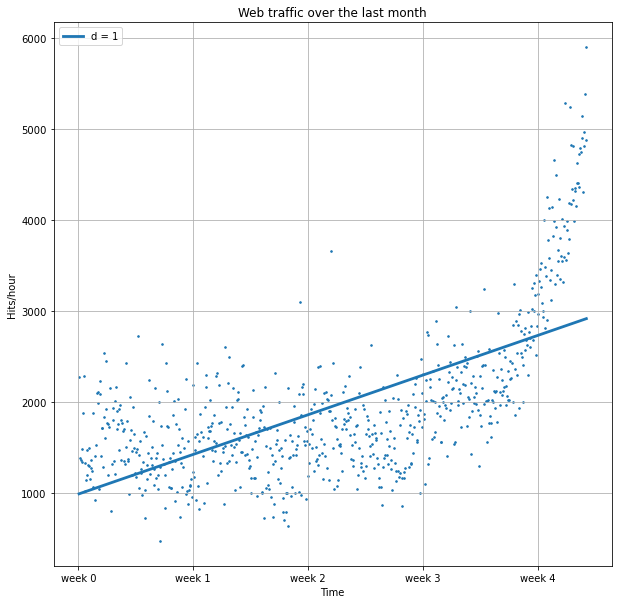

In [11]:
plotScatterAndCurves([title, xLabel, yLabel], [x, y], curveFunctions = cf)

## More complex curves

In [12]:
curves = []
for i in [1, 2, 3, 10, 30]:
    print(f'Curve of degree: {i}')
    curves.append((getCurve(x, y, i)))

Curve of degree: 1
Error: 317389767.33977807
Curve of degree: 2
Error: 179983507.8781792
Curve of degree: 3
Error: 139350144.03172523
Curve of degree: 10
Error: 121942326.36347426
Curve of degree: 30
Error: 110112294.02276263


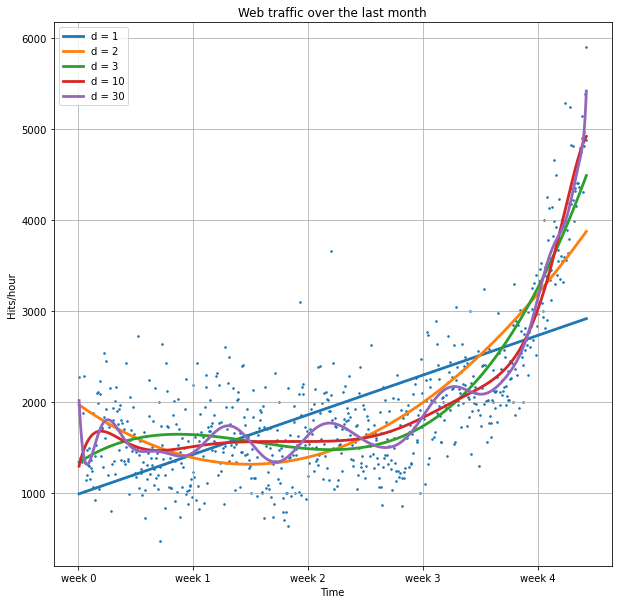

In [13]:
plotScatterAndCurves([title, xLabel, yLabel], [x, y], curveFunctions = curves)

## Overfitting

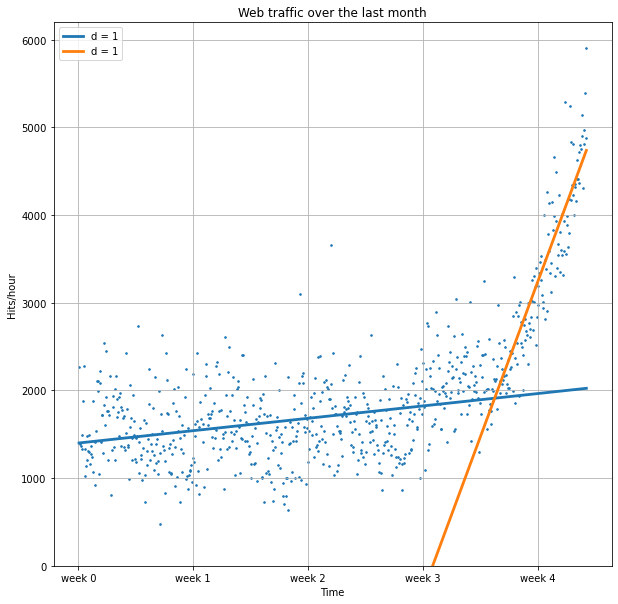

In [14]:
th = int(3.5*7*24)

x_a = x[:th]
y_a = y[:th]
x_b = x[th:]
y_b = y[th:]

line_a = np.poly1d(np.polyfit(x_a, y_a, 1))
line_b = np.poly1d(np.polyfit(x_b, y_b, 1))
plotScatterAndCurves([title, xLabel, yLabel], [x, y], curveFunctions = [line_a, line_b], lim = [(),(0, 6200)])

### Predicting on the next 2 weeks

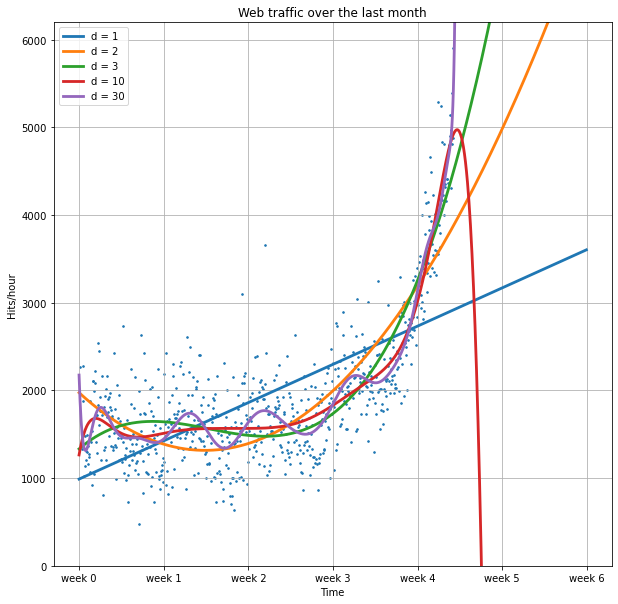

In [15]:
future_data = np.arange(7*24*6)
plotScatterAndCurves([title, xLabel, yLabel], [x, y], x_new = future_data, curveFunctions = curves, lim = [(),(0, 6200)])

### Fitting on last week data

In [16]:
curvesLastWeekFit = []
for i in [1, 2, 3, 10, 30]:
    print(f'Curve of degree: {i}')
    curvesLastWeekFit.append((getCurve(x_b, y_b, i)))

Curve of degree: 1
Error: 22143941.107618243
Curve of degree: 2
Error: 19768846.98917637
Curve of degree: 3
Error: 19766452.361026973
Curve of degree: 10
Error: 18949296.733070232
Curve of degree: 30
Error: 18415919.17510414


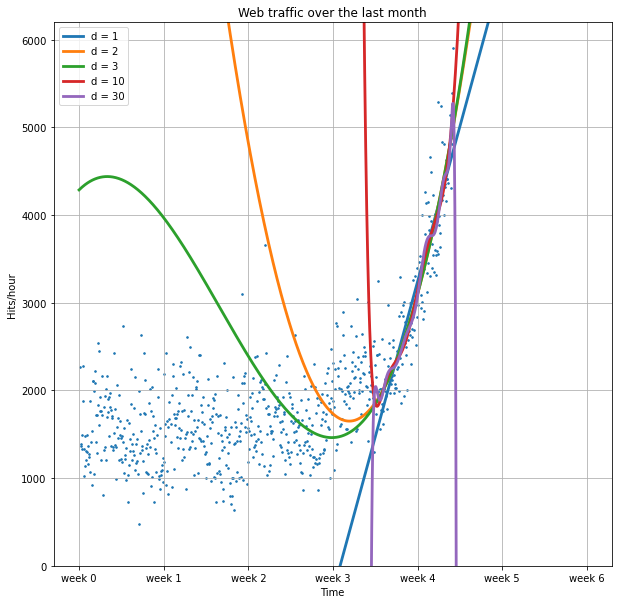

In [17]:
plotScatterAndCurves([title, xLabel, yLabel], [x, y], x_new = future_data, curveFunctions = curvesLastWeekFit, lim = [(),(0, 6200)])

## Getting insight based on best fit

In [18]:
#We checked that a 2-degree curve is a good fit
print(curves[1] - 100000)

         2
0.01053 x - 5.265 x - 9.803e+04


In [19]:
from scipy.optimize import fsolve

reached_max = fsolve(curves[1]-100000, 800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 19.708090
